In [ ]:
# In this script we want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 03/29/22

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

# Running in python because Julia hasn't really been working just yet


In [3]:
# ---------------------------------------------------
# --- packages to use ---
# ---------------------------------------------------

# First we need to import all of the packages we will be using!\n",
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

In [30]:
# ---------------------------------------------------
# --- LIST OF FUNCTIONS ---
# ---------------------------------------------------

# All functions necessary are in this cell

# ---------------------------------------------------    
# --- Keff function ---
# ---------------------------------------------------
def keff(i,j):
    # calculate the k_effective value given the i,j indices and the kd's (binding affinities)
    ℯ = math.e
    #kd1 = kds[0]; kd2 = kds[1]
    keff= kOn*(kd1**i)*(kd2**j)*ℯ**(-(i+j-1)*9/0.6)
    
    return keff

# ---------------------------------------------------
# --- EJD Eqns for stacked trimer ---   
# ---------------------------------------------------
def stackedTrimer(states, t):
    #x0Val = paramvaluesList[0] # initial condition for x1 
    x = states
    # list of ode's
    dx_0 = - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 2*kOn*0.5*x[0]*x[0] + 1*keff(1,0)*x[1] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*0.5*x[0]*x[0] + 1*keff(0,1)*x[2] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11]  
    dx_1 = + 2*kOn*0.5*x[0]*x[0] - 1*keff(1,0)*x[1] - 1*kOn*1*x[0]*x[1] + 3*keff(2,0)*x[3] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[4] - 1*kOn*1*x[0]*x[1] + 1*keff(0,1)*x[5] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,2)*x[8] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[9] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[7] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  
    dx_2 = + 1*kOn*0.5*x[0]*x[0] - 1*keff(0,1)*x[2] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[5] - 2*kOn*1*x[0]*x[2] + 1*keff(1,0)*x[4] - 2*kOn*1*x[1]*x[2] + 1*keff(2,0)*x[6] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 4*kOn*0.5*x[2]*x[2] + 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  
    dx_3 = + 1*kOn*1*x[0]*x[1] - 3*keff(2,0)*x[3] - 3*kOn*1*x[0]*x[3] + 1*keff(0,1)*x[6] - 3*kOn*1*x[1]*x[3] + 1*keff(0,2)*x[10] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11] - 3*kOn*0.5*x[3]*x[3] + 1*keff(0,3)*x[11]  
    dx_4 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[4] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[4] - 1*kOn*1*x[0]*x[4] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[4] + 2*keff(1,0)*x[7] - 1*kOn*1*x[0]*x[4] + 2*keff(1,1)*x[8] - 1*kOn*1*x[1]*x[4] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[4] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[4]*x[4] + 3*keff(4,1)*x[11]  
    dx_5 = + 1*kOn*1*x[0]*x[1] - 1*keff(0,1)*x[5] + 2*kOn*1*x[0]*x[2] - 1*keff(1,0)*x[5] - 1*kOn*1*x[0]*x[5] + 1*keff(2,0)*x[6] - 1*kOn*1*x[0]*x[5] + 2*keff(1,1)*x[8] - 1*kOn*1*x[0]*x[5] + 2*keff(1,0)*x[9] - 1*kOn*1*x[1]*x[5] + 1*keff(2,1)*x[10] - 2*kOn*1*x[2]*x[5] + 1*keff(3,0)*x[10] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[11]  
    dx_6 = + 3*kOn*1*x[0]*x[3] - 1*keff(0,1)*x[6] + 1*kOn*1*x[0]*x[4] - 1*keff(2,0)*x[6] + 1*kOn*1*x[0]*x[5] - 1*keff(2,0)*x[6] - 2*kOn*1*x[0]*x[6] + 2*keff(1,1)*x[10] + 2*kOn*1*x[1]*x[2] - 1*keff(2,0)*x[6] - 1*kOn*1*x[1]*x[6] + 6*keff(2,2)*x[11]  
    dx_7 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,0)*x[7] - 2*kOn*1*x[0]*x[7] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[7]  
    dx_8 = + 1*kOn*1*x[0]*x[4] - 2*keff(1,1)*x[8] + 1*kOn*1*x[0]*x[5] - 2*keff(1,1)*x[8] - 2*kOn*1*x[0]*x[8] + 1*keff(2,0)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,2)*x[8] + 4*kOn*0.5*x[2]*x[2] - 1*keff(2,0)*x[8] - 2*kOn*1*x[2]*x[8] + 3*keff(4,0)*x[11]  
    dx_9 = + 1*kOn*1*x[0]*x[5] - 2*keff(1,0)*x[9] - 2*kOn*1*x[0]*x[9] + 1*keff(2,1)*x[10] + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[9]  
    dx_10 = + 2*kOn*1*x[0]*x[6] - 2*keff(1,1)*x[10] + 2*kOn*1*x[0]*x[7] - 1*keff(2,1)*x[10] + 2*kOn*1*x[0]*x[8] - 1*keff(2,0)*x[10] + 2*kOn*1*x[0]*x[9] - 1*keff(2,1)*x[10] - 1*kOn*1*x[0]*x[10] + 6*keff(2,1)*x[11] + 3*kOn*1*x[1]*x[3] - 1*keff(0,2)*x[10] + 1*kOn*1*x[1]*x[4] - 1*keff(2,1)*x[10] + 1*kOn*1*x[1]*x[5] - 1*keff(2,1)*x[10] + 2*kOn*1*x[2]*x[4] - 1*keff(3,0)*x[10] + 2*kOn*1*x[2]*x[5] - 1*keff(3,0)*x[10]  
    dx_11 = + 1*kOn*1*x[0]*x[10] - 6*keff(2,1)*x[11] + 1*kOn*1*x[1]*x[6] - 6*keff(2,2)*x[11] + 2*kOn*1*x[2]*x[8] - 3*keff(4,0)*x[11] + 3*kOn*0.5*x[3]*x[3] - 1*keff(0,3)*x[11] + 1*kOn*0.5*x[4]*x[4] - 3*keff(4,1)*x[11] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[11]  
   
    states_prime = [dx_0, dx_1,dx_2,dx_3,dx_4, dx_5, dx_6,dx_7,dx_8,dx_9,dx_10,dx_11]
    
    return states_prime 

# ---------------------------------------------------
# --- Assembly Yield --- 
# ---------------------------------------------------
def calcAY24hrs(IC_1,XnTimePtsVec):
    # this function calculates the assembly yield for a time course of one species
    n=6; Xn = XnTimePtsVec;
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined - compare them-maybe Xn)
    XT = IC_1; # print(XT)
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn

# ---------------------------------------------------
# --- Assembly Yield vs IC --- 
# ---------------------------------------------------
def calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts):
    # this function calculates the AY for varying values of IC
    mags = np.linspace(minDeg_IC, maxDeg_IC,nICpts)
    allICs = 10**mags
    # initialize lists to stor
    AY_list = []
    # loop to solve AY for each IC 
    for icVal in allICs:
        # for each IC calc the sols and AY 
        IC_1=icVal
        states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
        # Now, integrate the ODEs and put the results in \"solution\"
        solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
        tVec = t; xStkTrm_tps_1 = solution_1[:,-1]
        # calculate AY
        Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
        # store the last AY value - since tc stops at 24hrs that's the AY at 24hrs
        AY_valStr = Yn_1[-1];
        AY_list.append(AY_valStr)
        
    return allICs, AY_list








print("Functions ready.")

Functions ready.


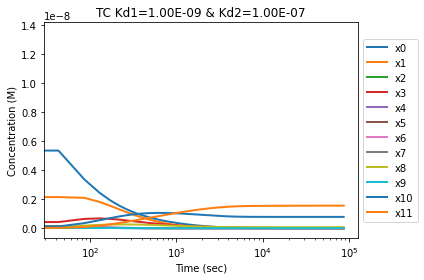

In [9]:
# ---------------------------------------------------
# --- Stacked trimer time course ---
# ---------------------------------------------------

# Plot a single time course for fixed parameter values

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter

# List of parameters that will be explored 
IC_1 = 1.35*10**-8;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-7 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]
# parametersList= [kOn,δ,Q, kd1,kd2]

# To intgrate ODEs, we need a vector for time
# Note that the units on t are in seconds
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
solution = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

ICFormat = format(IC_1,'.2E');kd1_format = format(kd1,'.2E');kd2_format = format(kd2,'.2E')

plt.semilogx(t,solution,'-',linewidth=2)
plt.title('TC Kd1=' + kd1_format + ' & Kd2=' + kd2_format)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(('x0','x1', 'x2','x3', 'x4','x5', 'x6','x7', 'x8','x9', 'x10','x11'),loc='center left', bbox_to_anchor=(1, 0.5))
#plt.show()  

# 
plt.tight_layout()
#plt.savefig('LL_tc_poster_kd1kd2_01_0329.png')
#plt.savefig('LL_tc_poster_kd1kd2_02_0329.png')
#plt.savefig('LL_tc_poster_kd1kd2_03_0329.png')
    

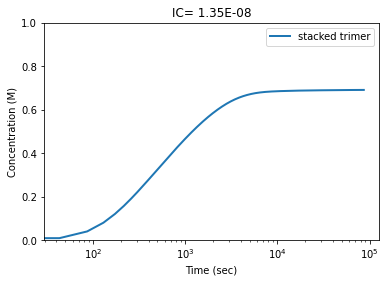

In [10]:
# ---------------------------------------------------
# --- Assembly Yield ---
# ---------------------------------------------------

# Calculate the assembly yield for a time course of the 12th species

tVec = t;
xStkTrm_tps = solution[:,-1] # the fully stacked trimer

Yn = calcAY24hrs(IC_1,xStkTrm_tps)

# --- plot AY values --- 
plt.semilogx(tVec,Yn,'-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (M)')
plt.legend(["stacked trimer"],loc='best')
#plt.show()  

#plt.tight_layout()
#plt.savefig('LL_SR_AY_odeInt_tols_m10_IC_4.58E-7_0324.png')

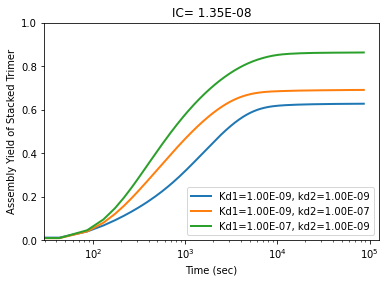

In [30]:
# ---------------------------------------------------
# --- Assembly Yield ---
# ---------------------------------------------------

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter


# List of parameters that will be explored 
IC_1 = 1.35*10**-8;
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)

states_0 = [IC_1,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0, 0.0,0.0]

# To intgrate ODEs, we need a vector for time
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)
# Now, integrate the ODEs and put the results in \"solution\"
# --- kd1 = kd2 = 10^-9 ---
kd1_1 = kd1; kd2_1= kd2;
solution_1 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-9 & kd2 = 10^-7 ---
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-7 # binding affinity BETWEEN rings (inter)
kd1_2 = kd1; kd2_2= kd2;
solution_2 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)
# --- kd1 = 10^-7 & kd2 = 10^-9 ---
kd1 = 10**-7 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
kd1_3 = kd1; kd2_3= kd2;
solution_3 = odeint(stackedTrimer,states_0,t,rtol = 1e-12, atol = 1e-12)

# Calculate the assembly yield for each time course of the 12th species
tVec = t;
xStkTrm_tps_1 = solution_1[:,-1] # the fully stacked trimer
xStkTrm_tps_2 = solution_2[:,-1]
xStkTrm_tps_3 = solution_3[:,-1]

Yn_1 = calcAY24hrs(IC_1,xStkTrm_tps_1)
Yn_2 = calcAY24hrs(IC_1,xStkTrm_tps_2)
Yn_3 = calcAY24hrs(IC_1,xStkTrm_tps_3)

# --- plot AY values --- 
ICFormat = format(IC_1,'.2E');
kd1_format_1 = format(kd1_1,'.2E');kd2_format_1 = format(kd2_1,'.2E')
kd1_format_2 = format(kd1_2,'.2E');kd2_format_2 = format(kd2_2,'.2E')
kd1_format_3 = format(kd1_3,'.2E');kd2_format_3 = format(kd2_3,'.2E')

plt.semilogx(tVec,Yn_1,'-',linewidth=2)
plt.semilogx(tVec,Yn_2,'-',linewidth=2)
plt.semilogx(tVec,Yn_3,'-',linewidth=2)
x1,x2,y1,y2 = plt.axis(); plt.axis((x1,x2,0,1))

plt.title('IC= '+ ICFormat)
plt.xlabel('Time (sec)')
plt.ylabel('Assembly Yield of Stacked Trimer')
plt.legend(["Kd1="+kd1_format_1+", kd2=" +kd2_format_1, "Kd1="+kd1_format_2+", kd2=" +kd2_format_2, "Kd1="+kd1_format_3+", kd2=" +kd2_format_3],loc='best')
#plt.show()  

#plt.tight_layout()
plt.savefig('LL_SR_AY_poster_0329.png')

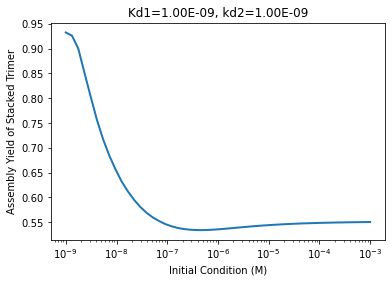

In [44]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# Binding strengths
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -9; maxDeg_IC = -3;

allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]

# now plot AY vs IC
kd1_format_1 = format(kd1,'.2E');kd2_format_1 = format(kd2,'.2E')

fig2 = plt.semilogx(allICs,AYvsIC_1,'-',linewidth=2)
#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1+", kd2=" +kd2_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.show()  
#plt.tight_layout()
plt.savefig('LL_SR_AYvsIC_0404.png')

In [ ]:
# ---------------------------------------------------
# --- Plot AY vs IC ---
# ---------------------------------------------------

# calculate the AY for increasing IC 

# --- PARAMETERS ---
# List of fixed parameters
kOn = 10**6
δ = 0 # degradation rate parameter
Q = 0 # synthesis rate parameter
# Binding strengths
kd1 = 10**-9 # binding affinity WITHIN rings (intra)
kd2 = 10**-9 # binding affinity BETWEEN rings (inter)
# other parameters 
tEnd = 86400 # 24hrs
t = np.linspace(0,tEnd,2000)

# make vector of all IC to consider
nICpts=50;
minDeg_IC = -9; maxDeg_IC = -3;

allAY_ICs = calcAYvsIC(minDeg_IC, maxDeg_IC, nICpts)
allICs = allAY_ICs[0]; AYvsIC_1=allAY_ICs[1]

# now plot AY vs IC
kd1_format_1 = format(kd1,'.2E');kd2_format_1 = format(kd2,'.2E')

fig2 = plt.semilogx(allICs,AYvsIC_1,'-',linewidth=2)
#plt.axis((x1,x2,0,1))
plt.title("Kd1="+kd1_format_1+", kd2=" +kd2_format_1)
plt.xlabel('Initial Condition (M)')
plt.ylabel('Assembly Yield of Stacked Trimer')
#plt.show()  
#plt.tight_layout()
plt.savefig('LL_SR_AYvsIC_0404.png')